## Import

In [ ]:
import numpy as np, pandas as pd
import seaborn as sns, pylab as plt
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dirpath = "/content/drive/MyDrive/Colab Notebooks/SetpointReinforcementLearning/results/"

## Figure 2 - testing on mode


In [ ]:
test_file = "test_mode_cartpole.csv"
df_testing = pd.read_csv(dirpath + test_file)
df_testing.head()

,Unnamed: 0,train,tested_on,episode,time,action-1,state-1,state,state_c,action,reward
0,0,modele_-1_classique,0,0,0,0.0,0.032208,0.031698,0.0,1,1.0
1,1,modele_-1_classique,0,0,1,1.0,0.027067,0.032208,0.0,1,1.0
2,2,modele_-1_classique,0,0,2,1.0,0.016279,0.027067,0.0,1,1.0
3,3,modele_-1_classique,0,0,3,1.0,-0.000189,0.016279,0.0,1,1.0
4,4,modele_-1_classique,0,0,4,1.0,-0.022407,-0.000189,0.0,0,1.0


In [ ]:
# columns
time = "time"
columns = ["state",	"state_c"]

### Variation à la consigne

pas tres interessant..

In [ ]:
"""
for _, group in df_testing.groupby("tested_on") :
  # update
  group["var"] = group["state_c"] - group["state"]
  # plot
  g = sns.FacetGrid(group, col="train", col_wrap=3)
  g.map_dataframe(sns.lineplot, x="time", y="var")
  g.add_legend()
  #plt.savefig(dirpath+"figure_test_cartpole.svg")
  plt.show()
"""

'\nfor _, group in df_testing.groupby("tested_on") :\n  # update\n  group["var"] = group["state_c"] - group["state"]\n  # plot\n  g = sns.FacetGrid(group, col="train", col_wrap=3)\n  g.map_dataframe(sns.lineplot, x="time", y="var")\n  g.add_legend()\n  #plt.savefig(dirpath+"figure_test_cartpole.svg")\n  plt.show()\n'

### Boxplot

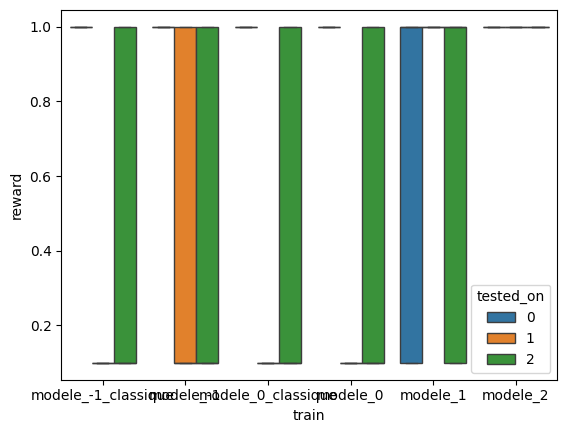

In [ ]:
#sns.pointplot(data=df_testing["reward"], color='k', linestyle="none", err_kws={'linewidth': 1.}, capsize=0.2)
sns.boxplot(x = df_testing['train'], y = df_testing['reward'], hue = df_testing['tested_on'], showfliers = False, palette=sns.color_palette(n_colors=3))
#plt.ylim(0,1)
plt.show()

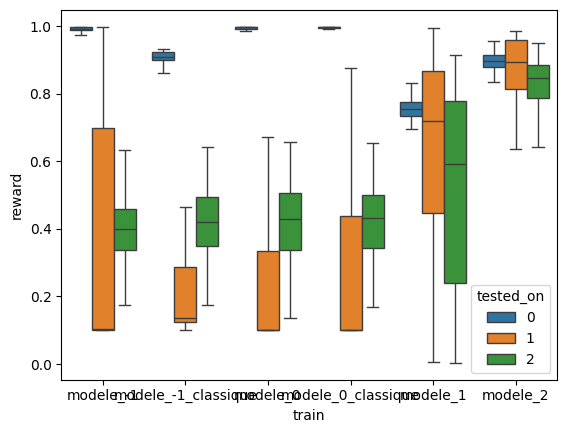

In [ ]:
choice_clm = ["train","tested_on","episode","reward"]
gb = df_testing[choice_clm].groupby(["train","tested_on","episode"])
df_sum = df_testing[choice_clm].groupby(["train","tested_on","episode"], as_index=False)['reward'].sum()
sns.boxplot(x = df_sum['train'], y = df_sum['reward'].divide(499), hue = df_sum['tested_on'], showfliers = False, palette=sns.color_palette(n_colors=3))
plt.show()

In [ ]:
for name, gb in df_sum.groupby(["train","tested_on"], as_index=False):
  print(gb['reward'].describe())

count    100.000000
mean     494.193000
std        3.864923
min      480.900000
25%      492.600000
50%      494.400000
75%      498.000000
max      498.000000
Name: reward, dtype: float64
count    100.000000
mean     172.569000
std      175.634196
min       49.800000
25%       49.800000
50%       51.600000
75%      348.375000
max      498.000000
Name: reward, dtype: float64
count    100.000000
mean     196.608000
std       46.734969
min       86.700000
25%      168.375000
50%      200.100000
75%      229.575000
max      316.200000
Name: reward, dtype: float64
count    100.000000
mean     452.541000
std       11.885932
min      400.800000
25%      448.500000
50%      453.900000
75%      461.100000
max      465.600000
Name: reward, dtype: float64
count    100.000000
mean     150.249000
std      153.310215
min       49.800000
25%       61.500000
50%       67.350000
75%      143.625000
max      467.400000
Name: reward, dtype: float64
count    100.000000
mean     207.291000
std       51.01

### Space Space (mode 2)

https://matthewmcgonagle.github.io/blog/2019/01/22/HeatmapBins

In [ ]:
df_mode2 = df_testing[df_testing["tested_on"]>1][["train","state","state_c","action"]]
df_mode2.head()

,train,state,state_c,action
99600,modele_-1_classique,-0.036269,-0.102027,1
99601,modele_-1_classique,-0.036086,-0.102136,1
99602,modele_-1_classique,-0.041982,-0.102274,1
99603,modele_-1_classique,-0.053954,-0.102446,0
99604,modele_-1_classique,-0.072039,-0.102656,0


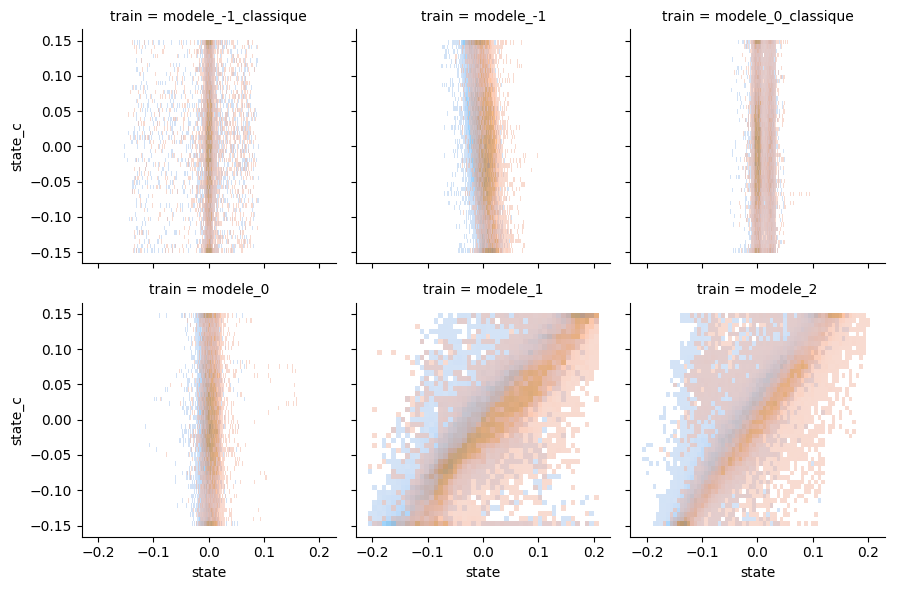

In [ ]:
#g = sns.FacetGrid(df_mode2.sample(6*500), col="train", col_wrap=3)
g = sns.FacetGrid(df_mode2, col="train", col_wrap=3)
#g.map_dataframe(sns.scatterplot, x="state", y="state_c", hue="action", alpha=0.5)
#g.map_dataframe(sns.kdeplot, x="state", y="state_c", hue="action", fill=True, common_norm=False, levels=10, alpha=0.9)#, alpha=0.9, linewidth=0,)
g.map_dataframe(sns.histplot, x="state", y="state_c", hue="action", alpha=0.5, fill=True)
g.add_legend()
plt.show()

In [ ]:
df_mode2_reduce = df_mode2.round(2)
df_mode2_reduce.head()

,train,state,state_c,action
99600,modele_-1_classique,-0.04,-0.1,1
99601,modele_-1_classique,-0.04,-0.1,1
99602,modele_-1_classique,-0.04,-0.1,1
99603,modele_-1_classique,-0.05,-0.1,0
99604,modele_-1_classique,-0.07,-0.1,0


In [ ]:
heatmap_data = df_mode2_reduce.pivot_table(index='state_c', columns='state', values='action', aggfunc='mean')
heatmap_data.head()

state,-0.21,-0.20,-0.19,-0.18,-0.17,-0.16,-0.15,-0.14,-0.13,-0.12,...,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21
state_c,,,,,,,,,,,,,,,,,,,,,
-0.15,0.0,0.0,0.057143,0.000000,0.014286,0.008850,0.075758,0.385681,0.561446,0.672986,...,0.333333,1.0,0.0,0.5,0.5,0.5,NaN,0.5,0.0,1.0
-0.14,0.4,0.2,0.000000,0.041667,0.000000,0.026786,0.038627,0.223642,0.483516,0.599303,...,1.000000,1.0,0.0,0.0,1.0,NaN,NaN,1.0,NaN,NaN
-0.13,NaN,0.0,0.000000,0.000000,0.000000,0.024390,0.037383,0.057143,0.276190,0.455150,...,1.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
-0.12,NaN,0.0,0.000000,0.111111,0.000000,0.025000,0.000000,0.028369,0.111607,0.344828,...,NaN,NaN,1.0,NaN,1.0,NaN,0.0,NaN,NaN,NaN
-0.11,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.037037,0.011628,0.072398,0.207006,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,1.0,NaN


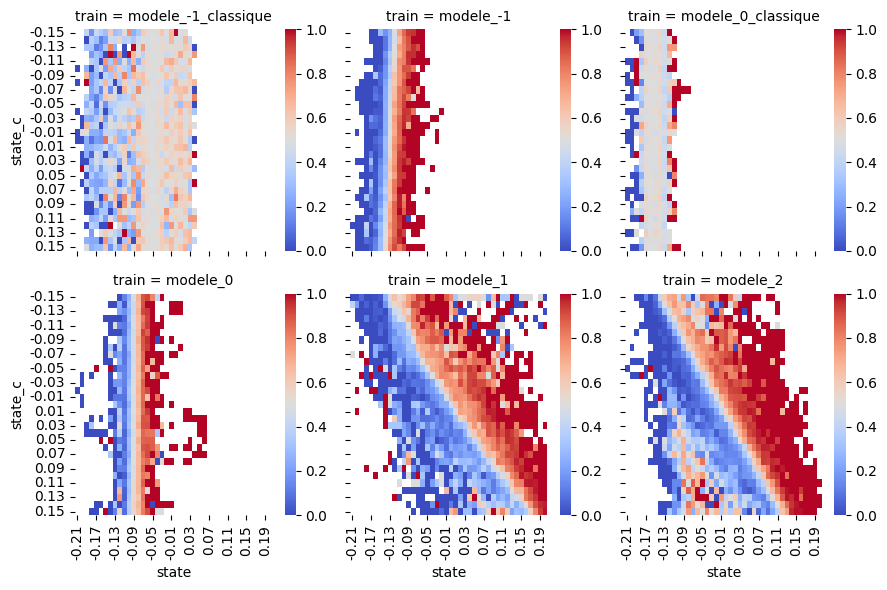

In [74]:
def facet_heatmap(data, color, **kws):
  data = data.pivot_table(index='state_c', columns='state', values='action', aggfunc='mean')
  #data = data.interpolate(method='nearest')
  sns.heatmap(data, **kws)

g = sns.FacetGrid(df_mode2_reduce, col="train", col_wrap=3)
g = g.map_dataframe(facet_heatmap, cmap='coolwarm')
plt.show()